# Critérios de Avaliação

Acurácia

Recall:
- O recall da classe 1 e da classe 0 não pode ser muito diferente.
- Se a recall da classe 1 supera a da classe 0, existe um overfit na classe 1. Vice-versa
- Ver "somas" das classes do lado esquerdo e do lado direito. Se a diferenca for muito grande, significa que o modelo classifica melhor uma das classes.
- Deve existir um maior erro a prever classe 0 do que classe 1

In [1]:
import pickle as pkl
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model

In [2]:
data_test = pd.read_csv('./../models/datasets/df_test.csv')

In [3]:
data_test_norm = pd.read_csv('./../models/datasets/test_normalize.csv')

# Para os seguintes modelos foi usado o dataset tratado, mas sem ser normalizado

In [4]:
def plot_cm(y_true, y_pred, figsize=(6,6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [5]:
def showModel(df_test, model):
    X_test = df_test.drop("target", axis = 1)
    y_test = df_test.target
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

### Modelo K-Nearest-Neighbors

In [6]:
KNN = pkl.load(open('models/modeloKNN.pkl','rb'))

Acurácia:
 0.8282868525896414
Report dos parametros:

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11360
           1       0.66      0.63      0.64      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.76      0.76     15060
weighted avg       0.83      0.83      0.83     15060

Matriz de confusão:



<ipython-input-4-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-4-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


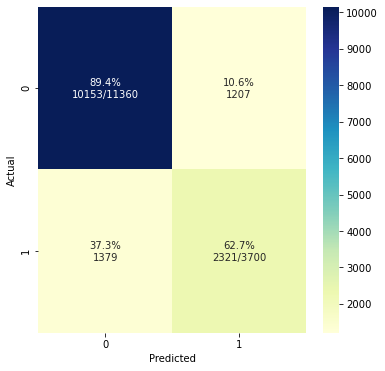

In [7]:
showModel(data_test,KNN)

### Modelo Random Forest

In [8]:
RandomForest = pkl.load(open('models/modeloRandomForest.pkl','rb'))

Acurácia:
 0.8088977423638778
Report dos parametros:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     11360
           1       0.58      0.79      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.80      0.77     15060
weighted avg       0.84      0.81      0.82     15060

Matriz de confusão:



<ipython-input-4-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-4-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


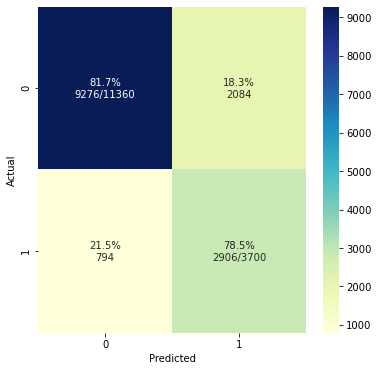

In [9]:
showModel(data_test,RandomForest)

### Modelo Naive-Bayes

In [10]:
NaiveBayes= pkl.load(open("models/modeloNaiveBayes.pkl",'rb'))

Acurácia:
 0.701261620185923
Report dos parametros:

              precision    recall  f1-score   support

           0       0.94      0.65      0.77     11360
           1       0.44      0.86      0.59      3700

    accuracy                           0.70     15060
   macro avg       0.69      0.76      0.68     15060
weighted avg       0.81      0.70      0.72     15060

Matriz de confusão:



<ipython-input-4-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-4-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


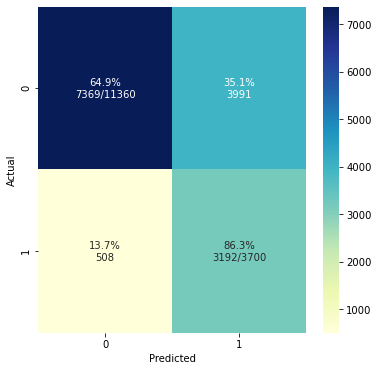

In [11]:
showModel(data_test,NaiveBayes)

### Modelo KMeans

Devido aos péssimos resultados obtidos por este modelo, decidimos não guardar tendo em conta que é certo que não vai ser o melhor modelo a usar usado e eventualmente a ser "deployed" para um mercado de trabalho.

# Para os seguintes modelos foi usado o dataset normalizado

### Modelo Regressão Logística

In [12]:
RegLog= pkl.load(open('models/modeloRegLog.pkl','rb'))

<ipython-input-4-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


Acurácia:
 0.803519256308101
Report dos parametros:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     11360
           1       0.57      0.79      0.66      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.80      0.76     15060
weighted avg       0.84      0.80      0.81     15060

Matriz de confusão:



<ipython-input-4-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


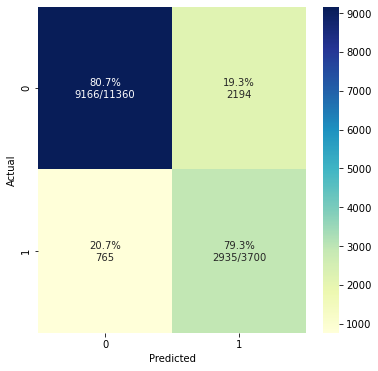

In [13]:
showModel(data_test_norm, RegLog)

### Modelo SVM (Support Vector Machine)

In [14]:
SVM = pkl.load(open('models/modeloSVM.pkl','rb'))

Acurácia:
 0.7933598937583002
Report dos parametros:

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     11360
           1       0.55      0.84      0.67      3700

    accuracy                           0.79     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.79      0.81     15060

Matriz de confusão:



<ipython-input-4-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-4-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


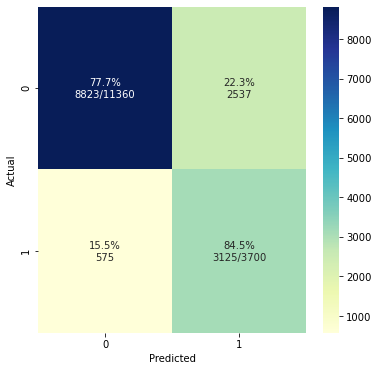

In [15]:
showModel(data_test_norm, SVM)

### Modelo Artificial Neural Networks

471/471 [==============================] - 0s 409us/step - loss: 0.4002 - accuracy: 0.7909
Accuracy: 
 0.7909030318260193

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     11360
           1       0.55      0.82      0.66      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.80      0.75     15060
weighted avg       0.84      0.79      0.80     15060


 Matriz de Confusão:



<ipython-input-4-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-4-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


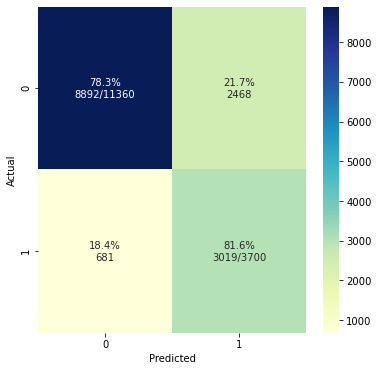

In [16]:
X_test = data_test_norm.drop("target", axis = 1)
y_test = data_test_norm.target
## To load model 
model = load_model('models/modelANN.h5')
## To load model IMPORT ===== from keras.models import load_model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
score = model.evaluate(X_test, y_test,verbose=1)
print('Accuracy: \n',score[1])
print ("\nClassification Report\n")
print (classification_report(y_test, y_pred))
print("\n Matriz de Confusão:\n")
plot_cm(y_test, y_pred)

# Conclusões

Com estes resultados conclui-se que se tivermos a analisar só em termos de acurácia, o modelo ideal seria o K-Nearest-Neighbors pois é o modelo que tem a melhor acurácia (~83%).

No entanto, o nosso grupo decidiu ter em conta o recall (como pode ser visto na secção de Critérios de Avaliação) para decidir qual o melhor modelo a ser utilizado. Com isto, conclui-mos que o melhor modelo será o modelo de Regressão Logística, pois tem uma acurácia alta e a matriz de confusão deste é a que apresenta melhores resultados.